# Bike Rental

In [80]:
#Loading Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

Loading and Understanding the dataset

In [2]:
os.chdir("C://Users/tamat/Desktop/JOB/Projects/Doing/Bike rental")

data = pd.read_csv("day.csv")

data.original=data.copy()

C:\Users\tamat\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


In [3]:
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


# Univariate Analysis

C:\Users\tamat\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


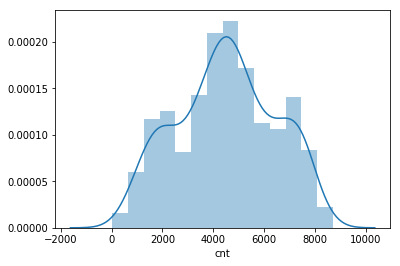

In [5]:
sns.distplot(data['cnt'])

C:\Users\tamat\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\tamat\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\tamat\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\tamat\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


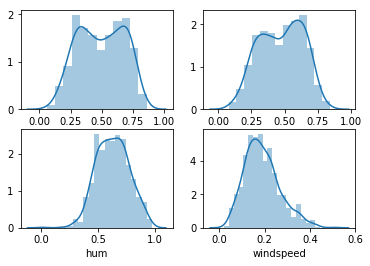

In [6]:
plt.figure(1)
plt.subplot(221)
sns.distplot(data['temp'])

plt.subplot(222)
sns.distplot(data['atemp'])

plt.subplot(223)
sns.distplot(data['hum'])

plt.subplot(224)
sns.distplot(data['windspeed'])

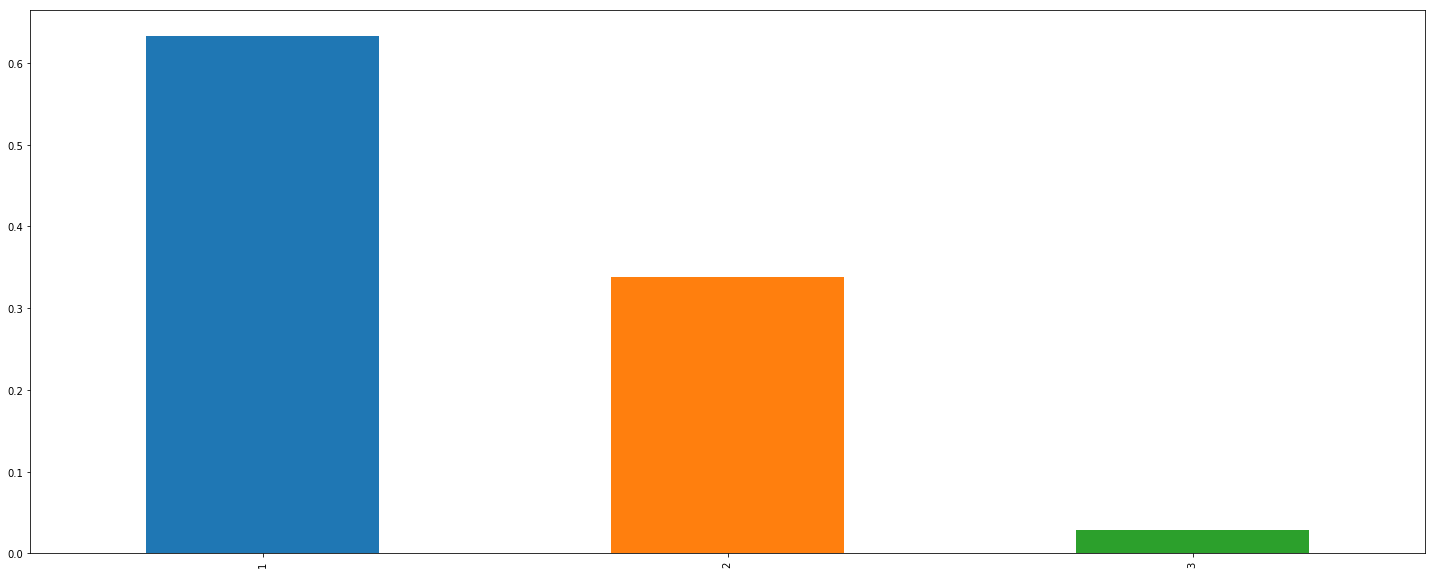

In [7]:
data['weathersit']=data['weathersit'].astype('category')
data['weathersit'].value_counts(normalize=True).plot.bar(figsize=(25,10))

# Multivariate Analysis

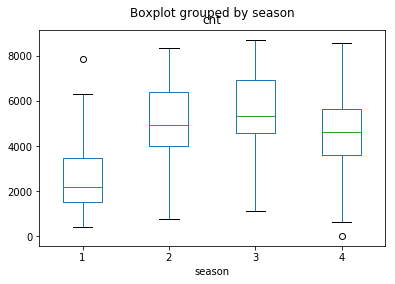

In [8]:
data.boxplot(by='season',column='cnt',grid=False)

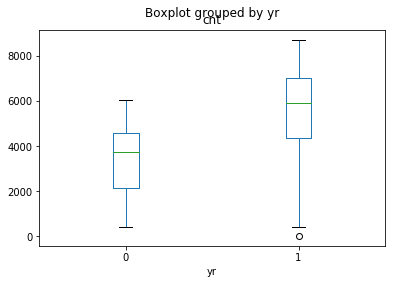

In [9]:
data.boxplot(by='yr',column='cnt',grid=False)

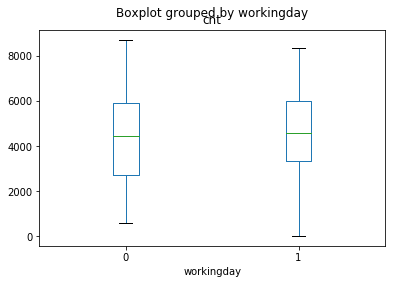

In [10]:
data.boxplot(by='workingday',column='cnt',grid=False)

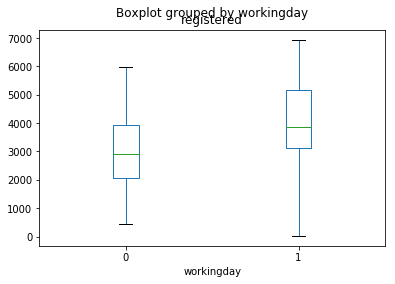

In [11]:
data.boxplot(by='workingday',column='registered',grid=False)

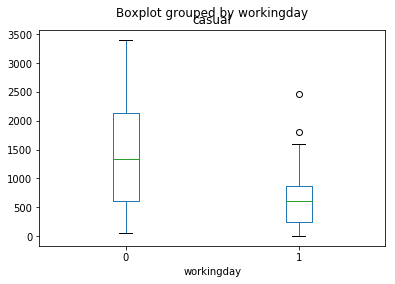

In [12]:
data.boxplot(by='workingday',column='casual',grid=False)

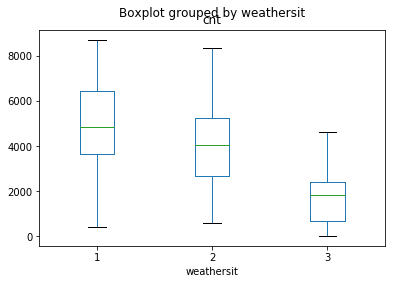

In [13]:
data.boxplot(by='weathersit',column='cnt',grid=False)

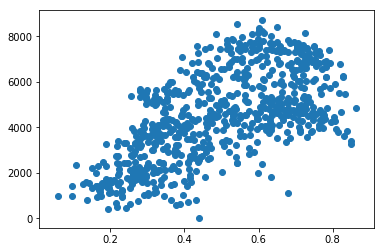

In [14]:
plt.scatter(data['temp'],data['cnt'])

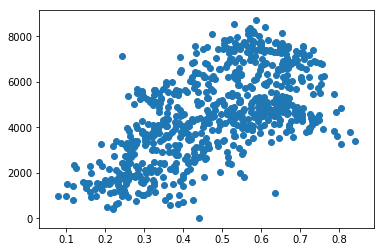

In [15]:
plt.scatter(data['atemp'],data['cnt'])

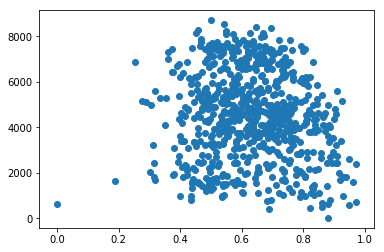

In [16]:
plt.scatter(data['hum'],data['cnt'])

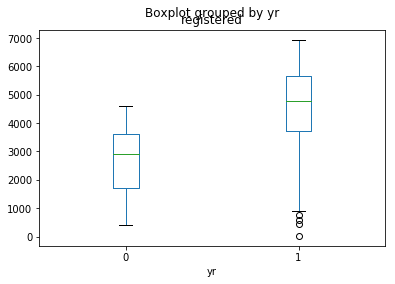

In [17]:
data.boxplot(by='yr',column='registered',grid=False)

# Missing Value and Outlier Analysis

In [18]:
#checking missing values in the data set
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [19]:
#There are no missing values in the dataset train

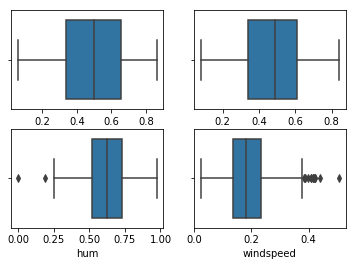

In [20]:
#Outlier analysis
plt.figure(1)
plt.subplot(221)
sns.boxplot(data['temp'])

plt.subplot(222)
sns.boxplot(data['atemp'])

plt.subplot(223)
sns.boxplot(data['hum'])

plt.subplot(224)
sns.boxplot(data['windspeed'])

In [21]:
#There are outliers in  humidity and windspeed 
#converting the outliers to NA values

for i in ['hum','windspeed']:
    #print(i)
    q75, q25 = np.percentile(data.loc[:,i], [75 ,25])
    iqr = q75 - q25
    minn = q25 - (iqr*1.5)
    maxx = q75 + (iqr*1.5)
#Converting to nan
    data.loc[data.loc[:,i] < minn,i] = np.nan
    data.loc[data.loc[:,i] > maxx,i] = np.nan
    print('{var} --------- :- {X}   Missing'.format(var = i, X = (data.loc[:,i].isnull().sum())))

hum --------- :- 2   Missing
windspeed --------- :- 13   Missing


In [22]:
#Imputing the values with mean 
data.windspeed = data.windspeed.fillna(data.windspeed.mean())
data.hum = data.hum.fillna(data.hum.mean())

In [23]:
#crosschecking if the missing values are imputed
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Feature Engineering 

In [24]:
# instant and dteday variables are unique and donot add to the observations 
# hence these variables needs to be removed

data=data.drop(['instant','dteday'],axis=1)

In [25]:
#Checking the data types again and converting the required into numerical for correlation plot
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null category
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: category(1), float64(4), int64(9)
memory usage: 75.1 KB


In [26]:
# need to convert weathersit into numerical
data['weathersit']=data['weathersit'].astype('int')

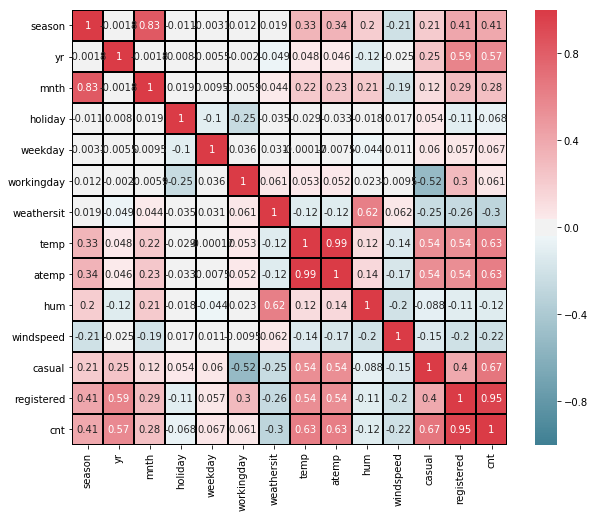

In [27]:
# Correlation matrix

#generating correlation matrix
datacorr=data.corr()

#Setting up the pane or matrix size
f, ax = plt.subplots(figsize=(10,8)) 

#Plot using Seaborn library
sns.heatmap(datacorr,mask=np.zeros_like(datacorr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),\
            square=True, ax=ax,annot=True,linewidths=1 , linecolor= 'black',vmin = -1, vmax = 1)

In [28]:
# From the above correlation plot we could conclude that:
# Season and month are correlated and therefore month is droped from the dataset for training the model
# temp and atemp are highly correlated and therefore atemp is droped form the dataset for training the model
# Cnt which is the target variable is the sum of registered and casual, so we need to drop these two variables as well

data=data.drop(['mnth','atemp','registered','casual'],axis=1)

# Model Building 

In [37]:
#Train-test split
x=data.drop(['cnt'],axis=1)
y=data['cnt']

x_train,y_train,x_test,y_test = train_test_split( x, y, test_size = 0.2)

In [70]:
#Defining a function for checking the accuracy of the model by crossvalidation 

def cross_accuracy(model):
    scores = cross_val_score(model, x_train, x_test, scoring="neg_mean_squared_error", cv=10)
    print(np.sqrt(-scores).mean())
    

Linear Regression

In [73]:
#Training the model
linear_model = LinearRegression().fit(x_train, x_test)

In [74]:
#RMSE value of linear regression model
cross_accuracy(linear_model)

889.3772226378367


Decision Tree

In [78]:
#Training the model
Dtree_model = DecisionTreeRegressor(random_state=101).fit(x_train,x_test)

In [79]:
#RMSE value of Decision tree model
cross_accuracy(Dtree_model)

872.1005214863002


Random Forest

In [81]:
#Training the model
forest_model = RandomForestRegressor(n_estimators=500,random_state=101).fit(x_train,x_test)

In [82]:
#RMSE value of Random Forest model
cross_accuracy(forest_model)

692.6537628621209


# Final Model Tuning

In [83]:
#Random Forest model gives the lowest RMSE score and therefore it is the model of choice

Final_model = RandomForestRegressor(max_depth= 15, max_features = 'sqrt',n_estimators = 500,random_state=101).fit(x_train,x_test)

In [84]:
#Accuracy of the final model
cross_accuracy(Final_model)

678.252619363437
